In [1]:
%load_ext autoreload
%autoreload 2

import time
import pickle
import numpy as np
from scipy import optimize

import matplotlib.pyplot as plt   
plt.style.use('seaborn-whitegrid')
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
from matplotlib import cm # for colormaps
import matplotlib.colors as colors
from mpl_toolkits.mplot3d import Axes3D



from HANCModel import HANCModelClass

In [4]:
folder_path = r'C:\Users\hms467\OneDrive - University of Copenhagen\Documents\Uni\11. semester\AMHA\AdvMacroHet\Assignments\Handin\A1_hanc\saved'
model_dict = np.load(folder_path + r'\model_dict.npy',allow_pickle=True).item()
model_dict['taua_list'] = np.linspace(0.01,0.8,11)
model_dict['taul_list'] = np.linspace(0.01,0.8,11)

In [2]:
%matplotlib widget

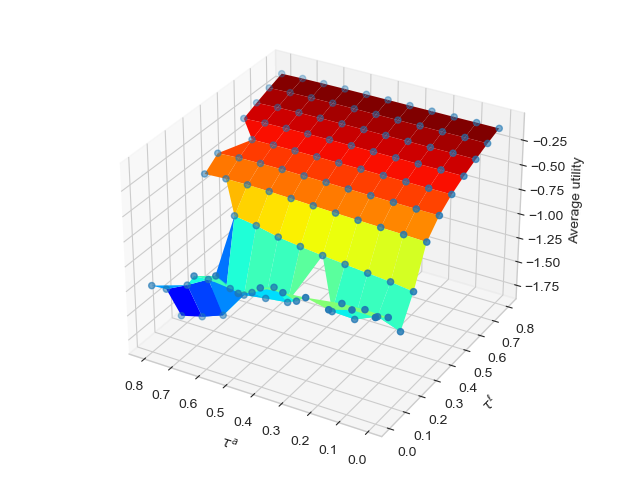

In [6]:
from matplotlib import cm # for colormaps
from mpl_toolkits.mplot3d import Axes3D


def plot_over_taugrid(model_dict,zvar,zname=''):
    taua_list = model_dict['taua_list']
    taul_list = model_dict['taul_list']

    taua_grid, taul_grid = np.meshgrid(taua_list,taul_list,indexing='ij')

    zgrid = model_dict[zvar]
    
    
    # a. actual plot
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1,projection='3d')
    
    ax.plot_surface(taua_grid,taul_grid,zgrid,cmap=cm.jet)
    
    ax.scatter(taua_grid,taul_grid,zgrid,cmap=cm.jet)
    
    # b. add labels
    ax.set_xlabel('$\\tau^{a}$') 
    ax.set_ylabel('$\\tau^{\ell}$')
    ax.set_zlabel(zname)

    # c. invert xaxis to bring Origin in center front
    ax.invert_xaxis()
    fig.tight_layout()
    


plot_over_taugrid(model_dict,'U_hh',zname='Average utility')

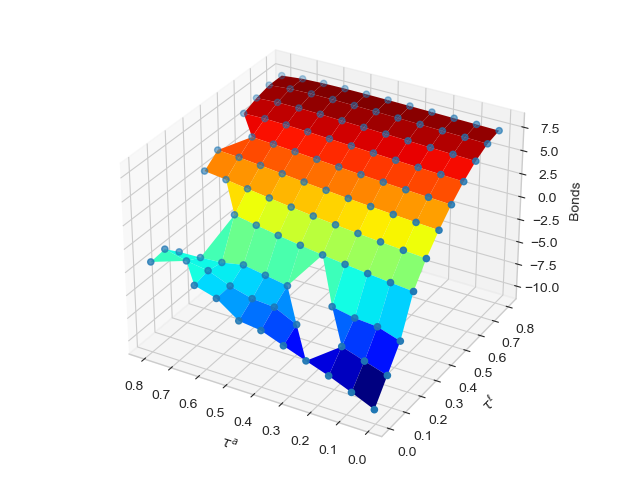

In [7]:
plot_over_taugrid(model_dict,'B',zname='Bonds')

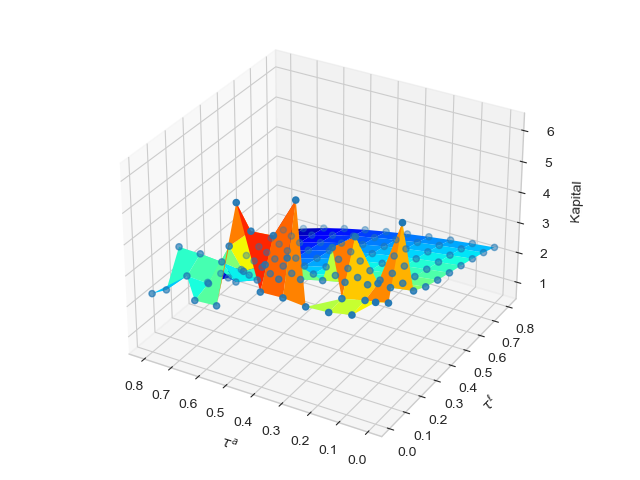

In [14]:
plot_over_taugrid(model_dict,'K',zname='Kapital')

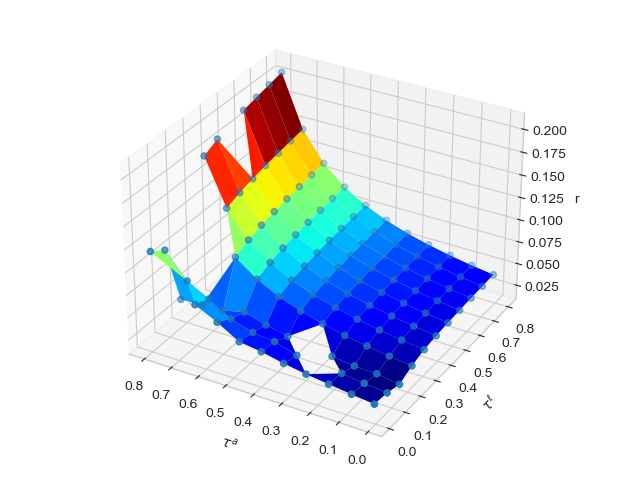

In [15]:
plot_over_taugrid(model_dict,'r',zname='r')

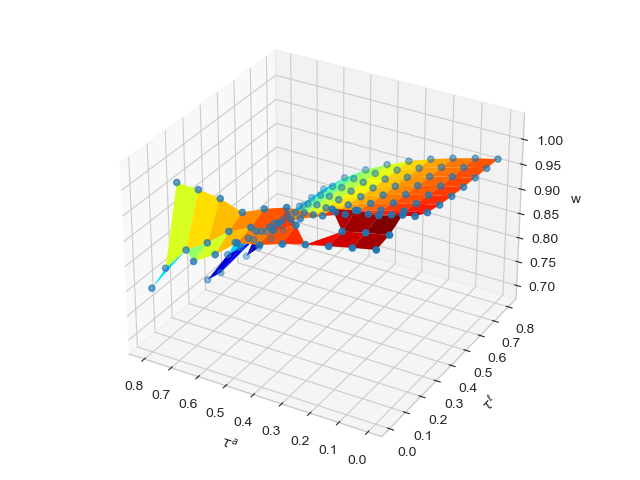

In [16]:
plot_over_taugrid(model_dict,'w',zname='w')

In [17]:
%matplotlib inline